In [37]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [38]:
mapping = json.loads(open('mapping.json').read())[0]['annotations']

In [39]:
points = []

for parklot in mapping:
    x = map(float, parklot['xn'].split(';'))
    y = map(float, parklot['yn'].split(';'))
    coords = np.array(list(zip(x, y))).astype(np.float32)
    reorder = np.zeros((4, 2), dtype=np.float32)
    reorder[0] = coords[np.argmin(coords.sum(axis=1))]
    reorder[1] = coords[np.argmin(np.diff(coords, axis=1))]
    reorder[2] = coords[np.argmax(coords.sum(axis=1))]
    reorder[3] = coords[np.argmax(np.diff(coords, axis=1))]
    points.append(reorder)

In [40]:
img = cv2.imread('images/2018-07-25 12_25_08.002.jpg')

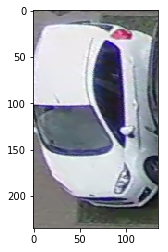

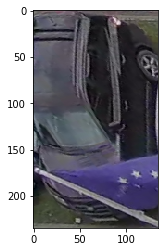

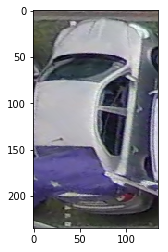

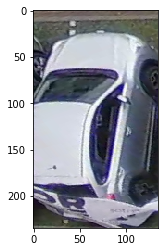

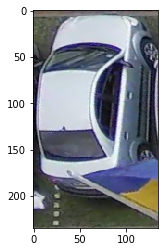

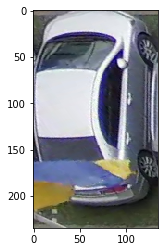

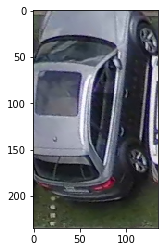

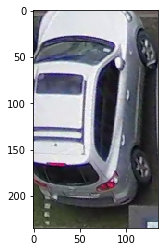

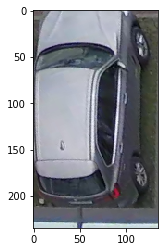

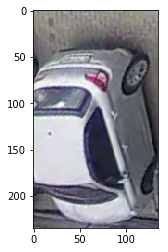

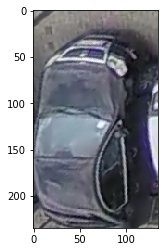

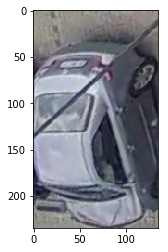

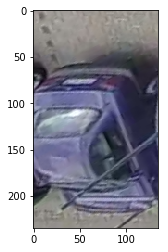

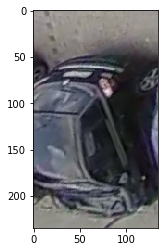

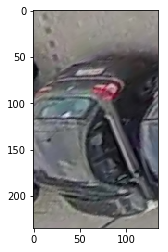

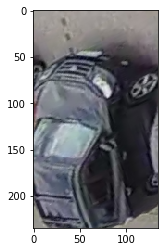

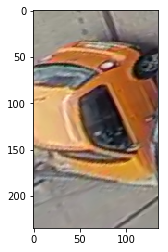

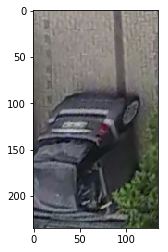

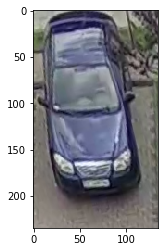

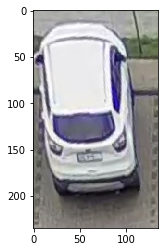

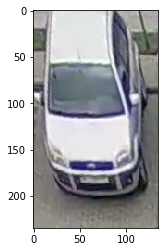

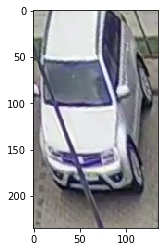

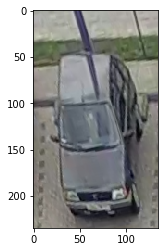

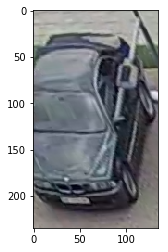

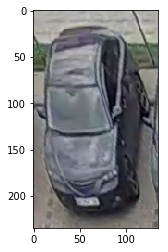

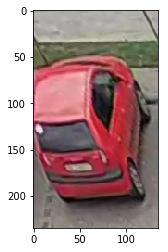

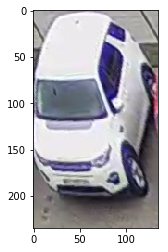

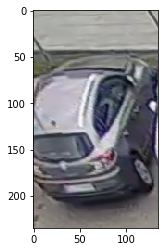

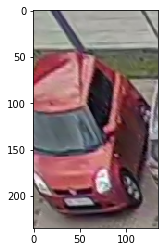

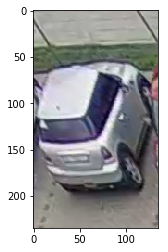

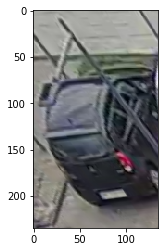

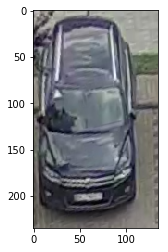

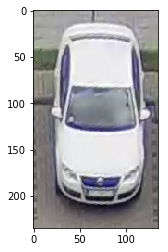

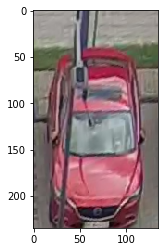

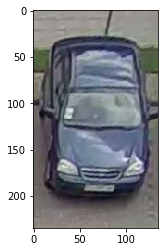

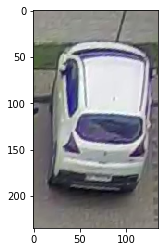

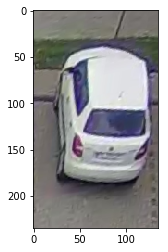

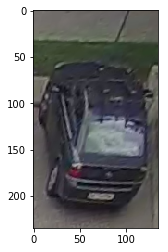

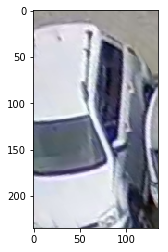

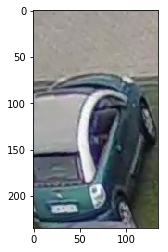

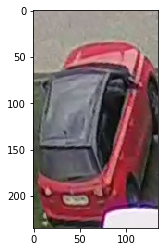

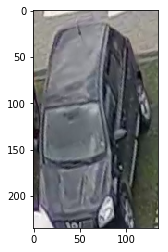

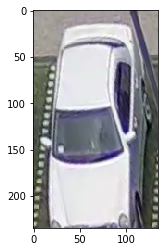

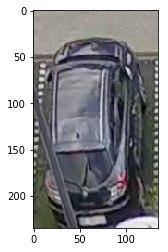

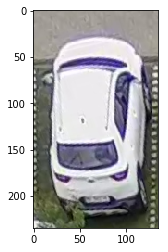

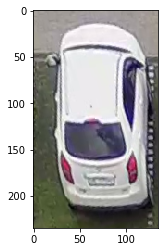

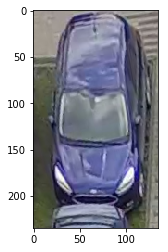

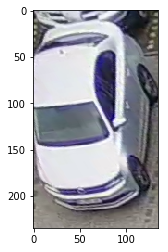

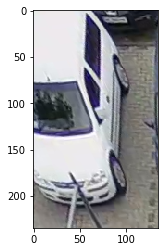

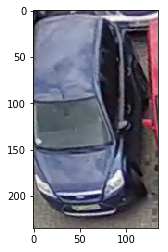

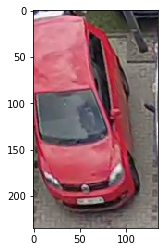

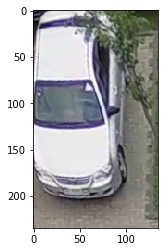

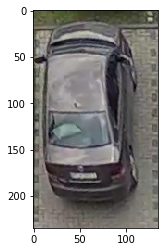

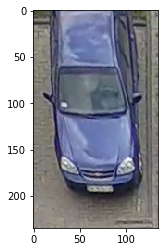

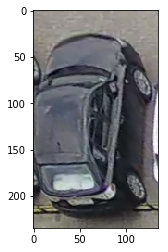

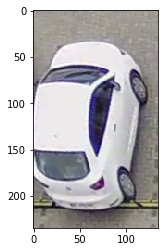

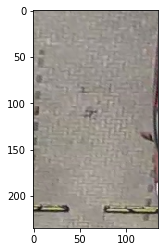

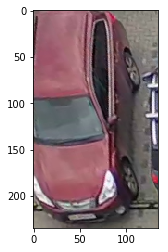

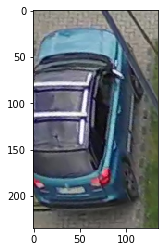

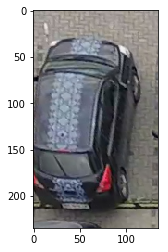

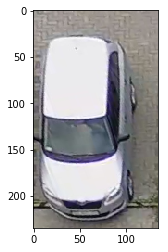

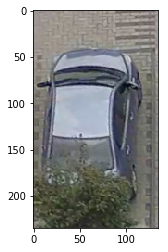

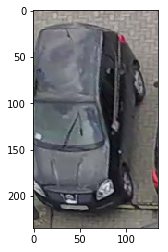

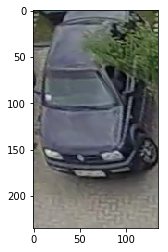

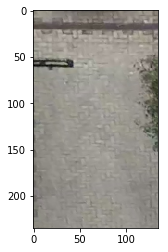

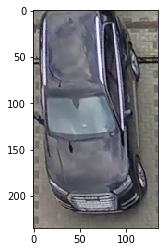

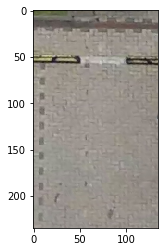

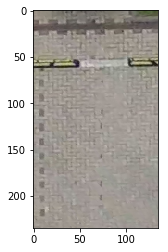

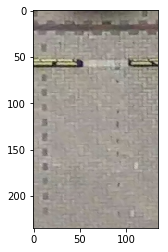

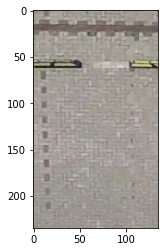

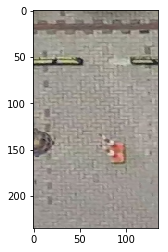

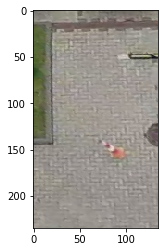

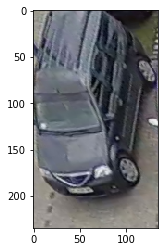

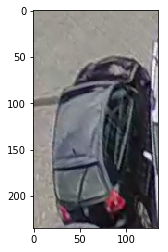

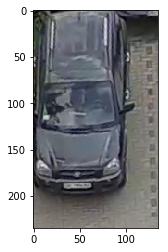

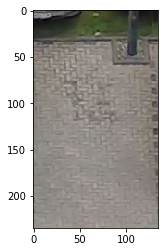

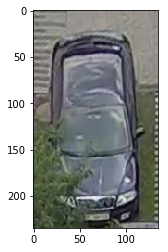

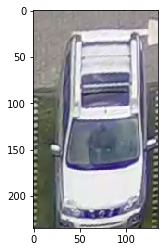

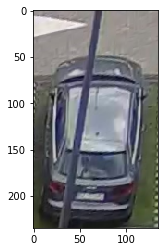

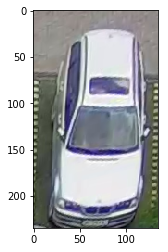

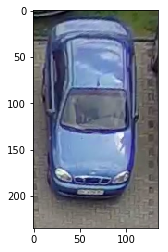

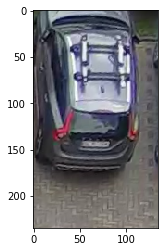

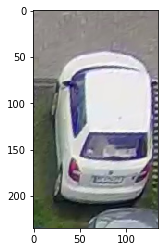

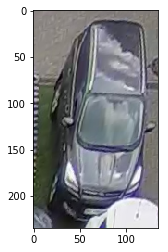

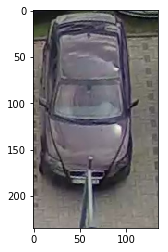

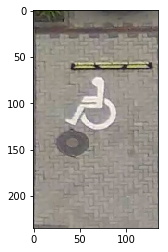

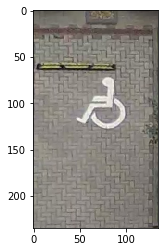

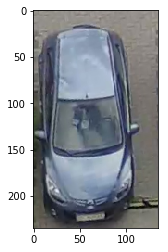

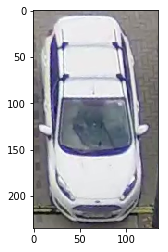

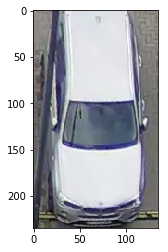

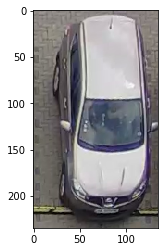

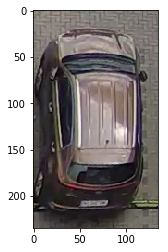

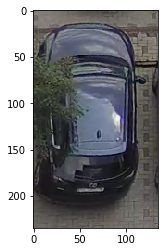

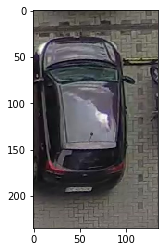

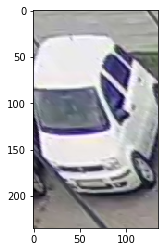

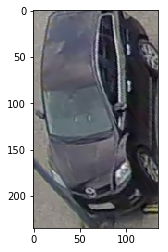

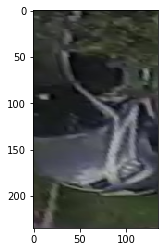

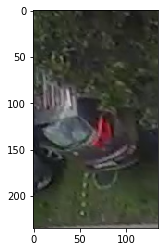

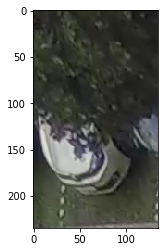

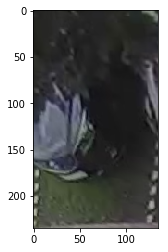

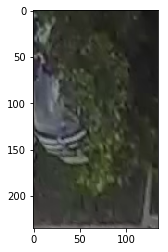

In [41]:
w = 135
h = 235

for parklot in points:
    parklot_rect = np.array([[0, 0], [w - 1, 0], [w - 1, h - 1], [0, h - 1]], dtype=np.float32)
    
    if np.linalg.norm(parklot[2] - parklot[3]) > np.linalg.norm(parklot[1] - parklot[2]):
        parklot = parklot[[1, 2, 3, 0]]
    
    matrix = cv2.getPerspectiveTransform(parklot, parklot_rect)
    
    cropped = cv2.warpPerspective(img, matrix, (w, h))
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))